In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv('/content/Student Depression Dataset.csv')

data.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


DATA PREPROCESING

In [ ]:
# Menangani missing values
def preprocess_data(data):
    print("\n--- Info Dataset Sebelum Preprocessing ---")
    print(data.info())

    # Memeriksa missing values
    for col in data.columns:
        if data[col].isnull().any():
            if data[col].dtype == 'object':
                data[col] = data[col].fillna(data[col].mode()[0])  # Use mode for categorical
            else:
                data[col] = data[col].fillna(data[col].median())  # Use median for numerical


    # Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    print("\n--- Info Dataset Setelah Preprocessing ---")
    print(data.info())
    return data, label_encoders

data, label_encoders = preprocess_data(data)

# Normalisasi fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=np.number).columns # Changed to include all numeric types
data[numeric_features] = scaler.fit_transform(data[numeric_features])


--- Info Dataset Sebelum Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration            

EXPLORATORY DATA ANALYSIS


--- Statistik Deskriptif ---
                 id        Gender           Age          City    Profession  \
count  2.790100e+04  2.790100e+04  2.790100e+04  2.790100e+04  2.790100e+04   
mean  -9.779162e-17  4.685849e-17  1.739367e-16  1.795393e-17  2.473568e-15   
std    1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00  1.000018e+00   
min   -1.733252e+00 -1.121811e+00 -1.594566e+00 -1.607649e+00 -4.505911e+01   
25%   -8.711309e-01 -1.121811e+00 -9.830196e-01 -7.516805e-01  2.556028e-02   
50%    5.950982e-03  8.914162e-01 -1.676248e-01 -1.402743e-01  2.556028e-02   
75%    8.704592e-01  8.914162e-01  8.516186e-01  1.082538e+00  2.556028e-02   
max    1.728742e+00  8.914162e-01  6.763230e+00  1.510522e+00  8.222773e+00   

       Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count       2.790100e+04   2.790100e+04  2.790100e+04        2.790100e+04   
mean        1.871793e-17  -2.037326e-18  4.008438e-16        4.456650e-18   
std         1.000018e+00   

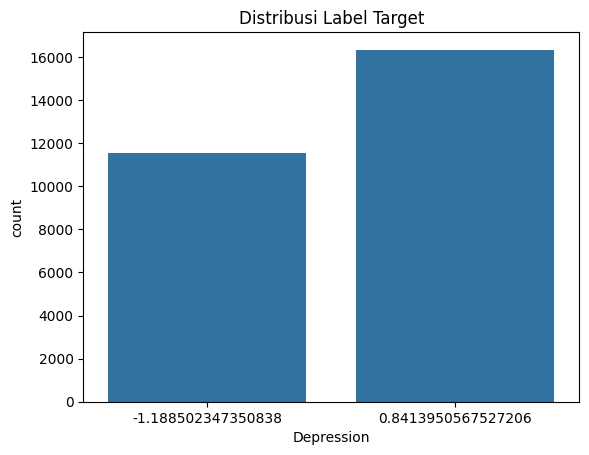


--- Korelasi Fitur ---


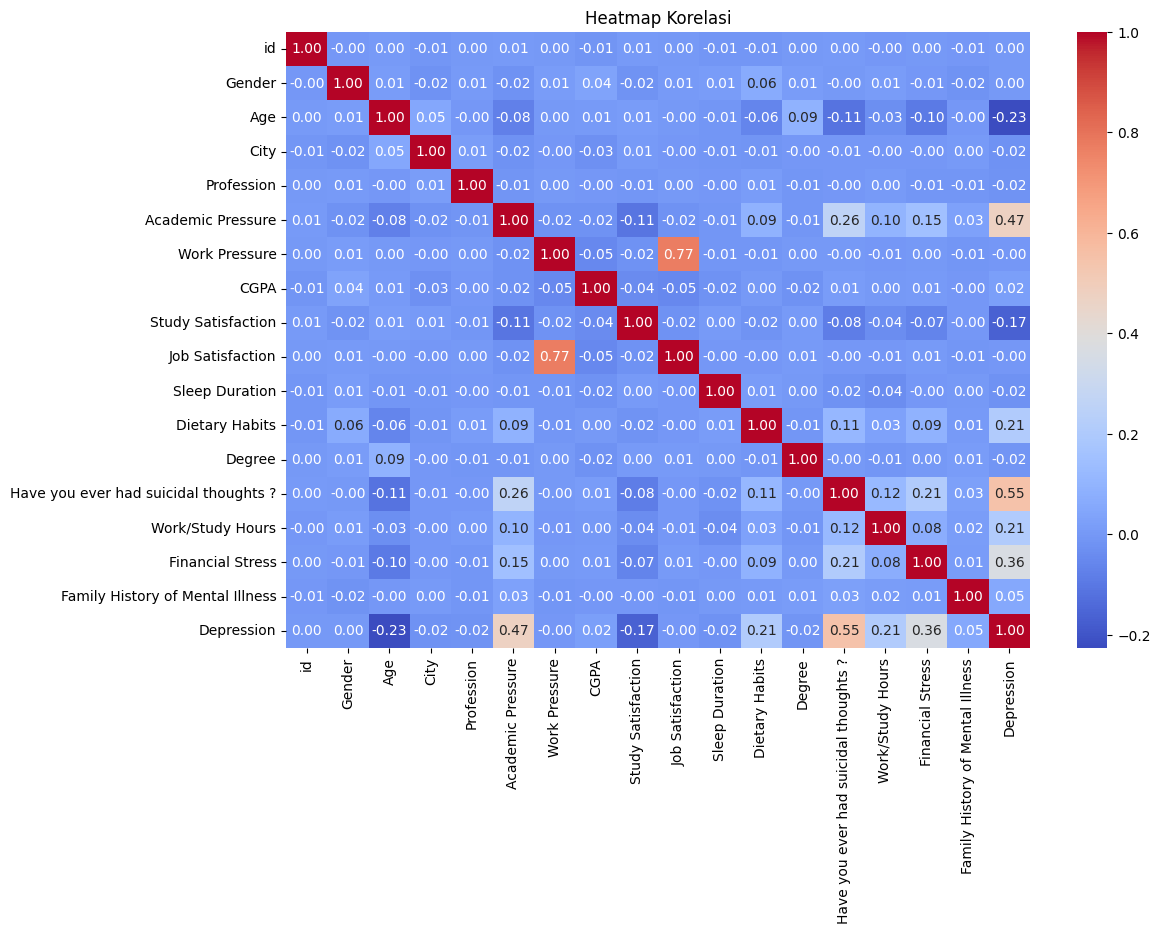

In [ ]:
# Analisis eksplorasi
def eda(data):
    print("\n--- Statistik Deskriptif ---")
    print(data.describe())

    print("\n--- Distribusi Label Target ---")
    sns.countplot(x=data.iloc[:, -1])  # Menggunakan kolom terakhir sebagai target
    plt.title("Distribusi Label Target")
    plt.show()

    print("\n--- Korelasi Fitur ---")
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Heatmap Korelasi")
    plt.show()

eda(data)

 SELEKSI FITUR

In [ ]:
# Seleksi fitur dengan SelectKBest
X = data.iloc[:, :-1]  # Semua kolom kecuali target
y = data.iloc[:, -1]   # Target label

# Pilih K fitur terbaik
selector = SelectKBest(score_func=f_classif, k=10)  # Menyesuaikan jumlah fitur yang dipilih
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\n--- Fitur Terpilih ---")
print(selected_features)


--- Fitur Terpilih ---
Index(['Age', 'City', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')


MODELING

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Melatih model SVM
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

EVALUASI MODEL

In [ ]:
# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test)
print("\n--- Evaluasi Model ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


--- Evaluasi Model ---
Confusion Matrix:
 [[1829  514]
 [ 391 2847]]
Accuracy Score: 0.8378426805232038
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

